# 🧭 Appercu
Ce Notebook vous conduit pas à pas :

     Comprendre la représentation numérique des images
     Maîtriser OpenCV pour manipuler des images
     Appliquer des filtres et transformations géométriques
     Détecter des couleurs spécifiques
     Identifier les contours dans une image

## PRÉTRAITEMENT (Nettoyage, Filtrage,... )

In [ ]:
#Imports necessaire
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Charger une image
image = cv2.imread('cat.jpg')

# Afficher l'image avec OpenCV
#cv2.imshow('Mon Image', image)
#cv2.waitKey(0)  # Attendre une touche 
#cv2.destroyAllWindows() #tuer la fenetre ouverte
 

In [ ]:
#Sauvegarder l'image chargee sous le nom copie_1
cv2.imwrite('copie_1.jpg', image)

True

In [ ]:
#Creer une Copie de l'image charge
copie = image.copy()


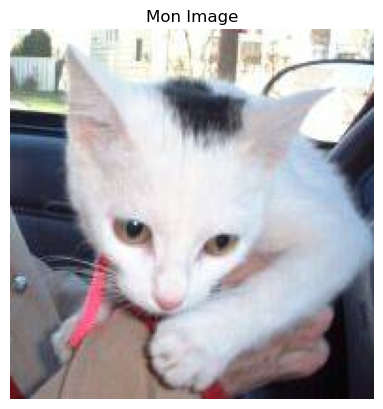

In [ ]:
# Afficher l'image chargee avec Matplotlib
plt . imshow ( cv2.cvtColor ( image , cv2.COLOR_BGR2RGB ) ) # convertir en RGB pour correspondre a l'espace colorimetrique attendu par Matplotlib 
plt . title ("Mon Image") # ajouter un titre d'affichage pour l'image
plt . axis ("off") # supprime les axes pour afficher uniquement l’image
plt . show ()

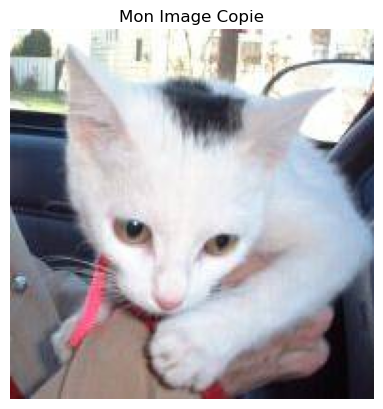

In [66]:

plt . imshow ( cv2.cvtColor ( copie , cv2.COLOR_BGR2RGB ) )
plt . title ("Mon Image Copie")
plt . axis ("off")
plt . show ()

In [ ]:
# Affiche les dimensions de l'image (larg, hauteur, canaux)
print(f"Dimensions: {image.shape}") 
#Affiche les types de donnees(uint8)
print(f"Type de données: {image.dtype}")  
# Affiche taille de l'image en memoire (larg x hauteur x canaux)
print(f"Taille en mémoire: {image.size} pixels") 
print(f"Hauteur: {image.shape[0]}, Largeur: {image.shape[1]}")

Dimensions: (196, 193, 3)
Type de données: uint8
Taille en mémoire: 113484 pixels
Hauteur: 196, Largeur: 193


In [68]:
# Acceder a un pixel (y, x)
pixel = copie[100, 150]  
print(f"Valeur RGB du pixel: {pixel}")
# Modifier un pixel
copie[100, 150] = [0, 0, 200]  # Rouge en BGR
# Sauvegarder l'image
cv2.imwrite('image_modifiee.jpg', copie)

Valeur RGB du pixel: [226 215 211]


True

In [69]:
# Separer les canaux
b, g, r = cv2.split(image)

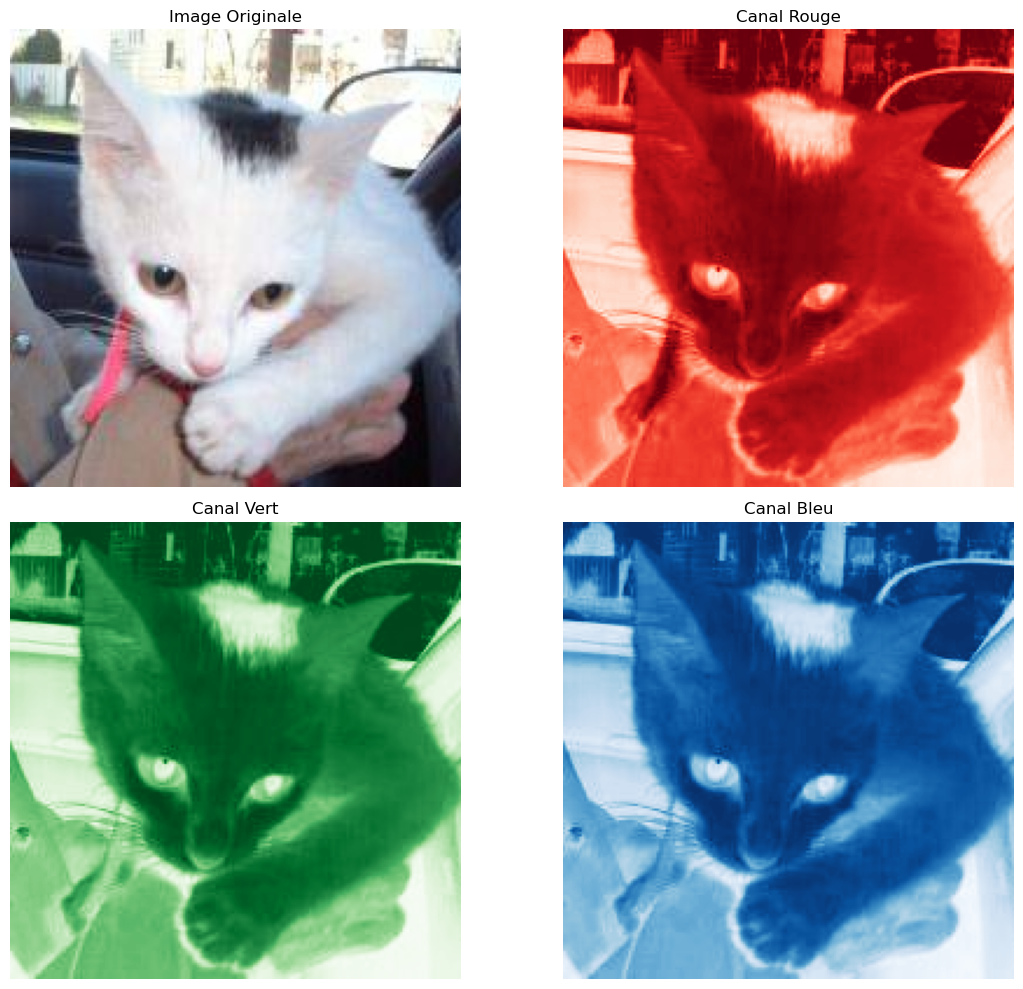

In [ ]:
# Visualiser chaque canal
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
# Affiche la premiere image(Image Originale)
axes[0, 0].imshow(cv2. cvtColor ( image , cv2 . COLOR_BGR2RGB ))
axes[0, 0].set_title('Image Originale')
axes[0, 0].axis('off')
# Affiche la deuxieme image(Canal Rouge)
axes[0, 1].imshow(r, cmap='Reds')
axes[0, 1].set_title('Canal Rouge')
axes[0, 1].axis('off')
# Affiche la troisieme image(Canal Vert)
axes[1, 0].imshow(g, cmap='Greens')
axes[1, 0].set_title('Canal Vert')
axes[1, 0].axis('off')
# Affiche quatrieme image(Canal Bleu)
axes[1, 1].imshow(b, cmap='Blues')
axes[1, 1].set_title('Canal Bleu')
axes[1, 1].axis('off')

plt.tight_layout()# ajuste automatiquement l'espacement entre les sous-graphiques
plt.show()

In [ ]:
 img_rouge = image.copy ()
 # mettre le canal bleu a 0 
 img_rouge[: , : , 0] = 0 
 # mettre le canal bleu a 0 
 img_rouge[: , : , 1] = 0


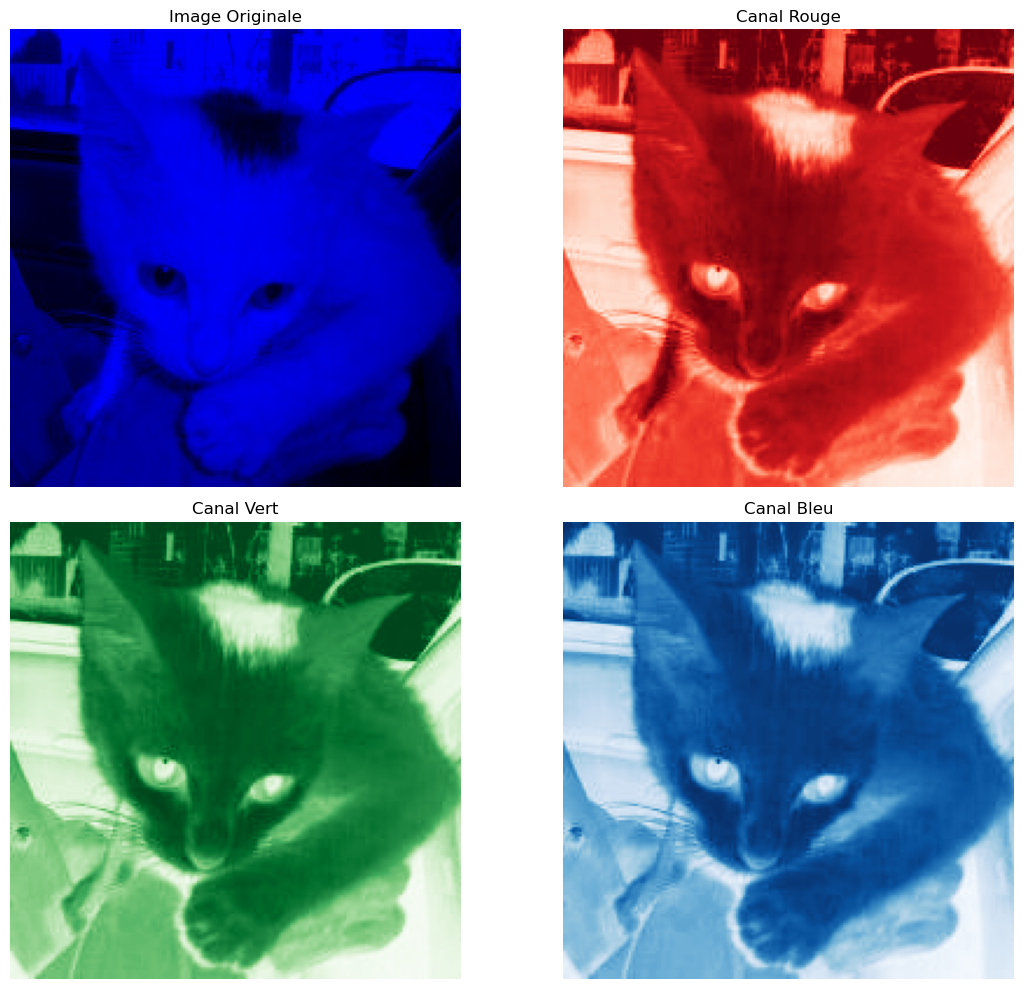

In [72]:
# Visualiser chaque canal
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(img_rouge)
axes[0, 0].set_title('Image Originale')
axes[0, 0].axis('off')
axes[0, 1].imshow(r, cmap='Reds')
axes[0, 1].set_title('Canal Rouge')
axes[0, 1].axis('off')
axes[1, 0].imshow(g, cmap='Greens')
axes[1, 0].set_title('Canal Vert')
axes[1, 0].axis('off')
axes[1, 1].imshow(b, cmap='Blues')
axes[1, 1].set_title('Canal Bleu')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

## Conversion dans l'espace colorimetrique

In [119]:
#Conversion dans l'espace colorimetrique
rgb = cv2 . cvtColor ( image , cv2 . COLOR_BGR2RGB ) #Convertit de (Blue, Green, Red) vers (Red, Green, Blue)
gray = cv2 . cvtColor ( image , cv2 . COLOR_BGR2GRAY ) #Convertit de (Blue, Green, Red) vers (Gray)
hsv = cv2 . cvtColor ( image , cv2 . COLOR_BGR2HSV ) #Convertit de (Blue, Green, Red) vers HSV (Teinte, Saturation, Valeur)
lab = cv2 . cvtColor ( image , cv2 . COLOR_BGR2LAB ) #Convertit de (Blue, Green, Red) vers LAB (Luminance, Axe vert-rouge, Axe bleu-jaune)


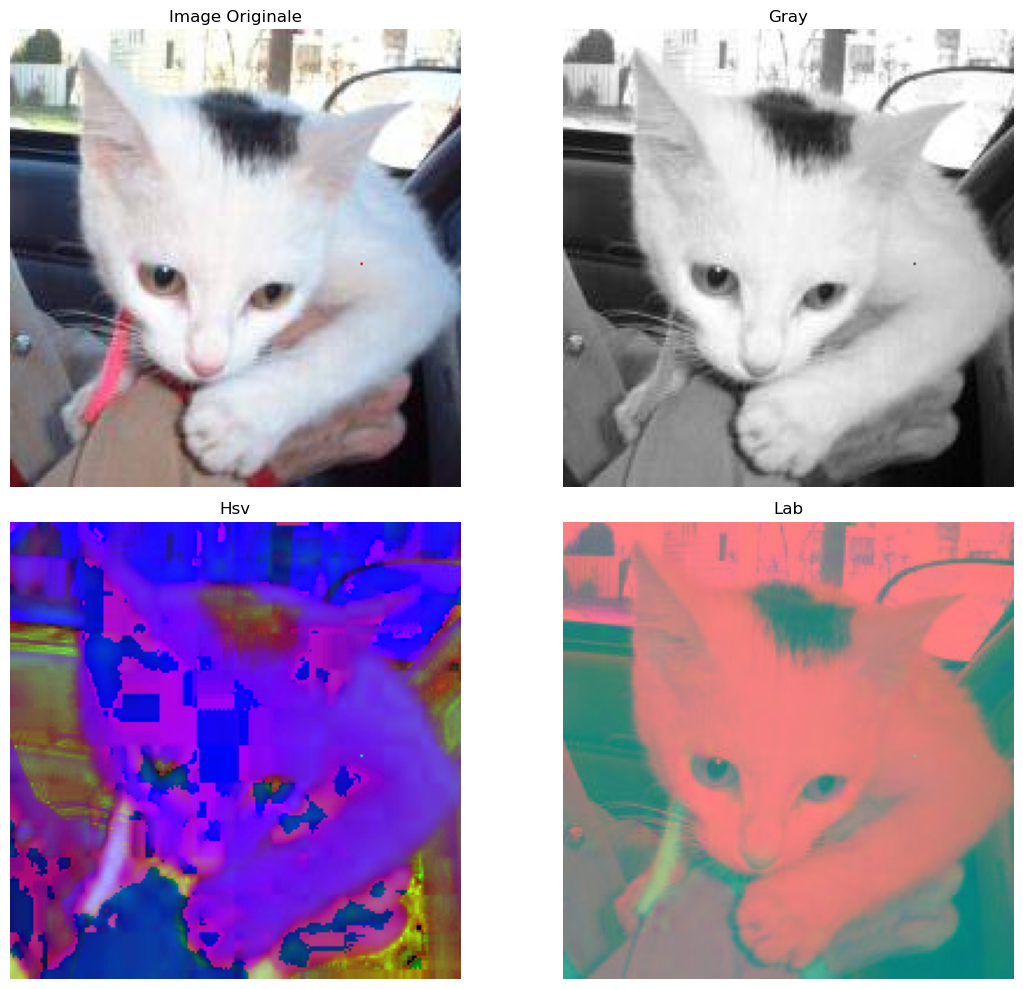

In [120]:
# Visualiser l'image dans les differents espaces colorimetriques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(rgb)
axes[0, 0].set_title('Image Originale')
axes[0, 0].axis('off')
axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Gray')
axes[0, 1].axis('off')
axes[1, 0].imshow(hsv, cmap='gray')
axes[1, 0].set_title('Hsv')
axes[1, 0].axis('off')
axes[1, 1].imshow(lab, cmap='gray')
axes[1, 1].set_title('Lab')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

## Transformations Geometriques

In [ ]:
# Reduit l'image a une taille fixe de 400 X 300 pixels
petit = cv2 . resize ( image , (400 , 300) ) 
# Agrandit l'image de a une taille de 150% en utilisant une interpolation bicubique pour une meilleure qualité
grand = cv2 . resize ( image, None, fx =1.5 , fy =1.5, interpolation = cv2 . INTER_CUBIC )


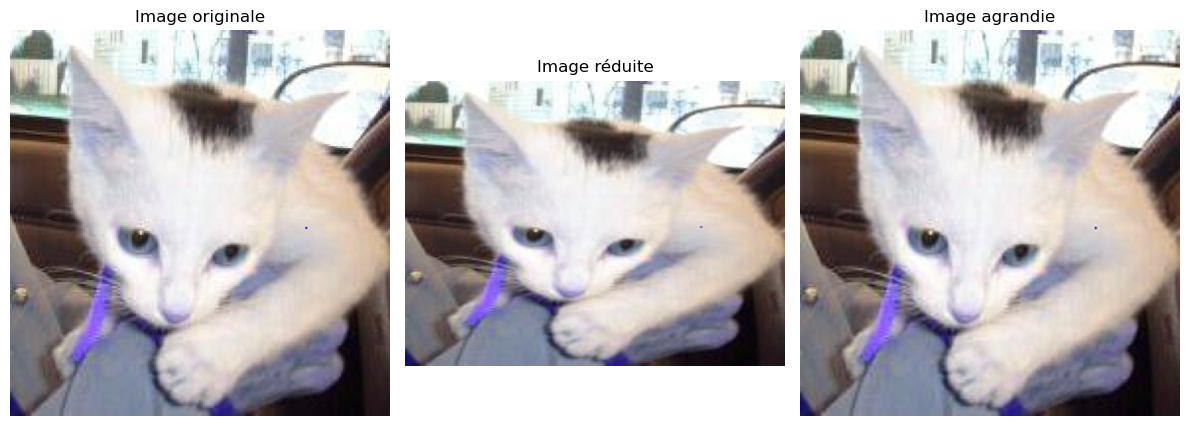

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 10))

axes[0].imshow(cv2 . cvtColor ( image , cv2 . COLOR_BGR2RGB ))
axes[0].set_title('Image originale')
axes[0].axis('off')

axes[1].imshow(cv2 . cvtColor ( petit, cv2 . COLOR_BGR2RGB ))
axes[1].set_title('Image réduite')
axes[1].axis('off')

axes[2].imshow(cv2 . cvtColor (grand, cv2 . COLOR_BGR2RGB ))
axes[2].set_title('Image agrandie')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Rotation
h , w = image.shape [:2] # recupere la hauteur(h) et la largeur(w)
center = ( w // 2 , h // 2) # definit les coordonnees du centre de l'image

# crée la matrice de transformation pour une rotation de 30° autour du centre
# le facteur d’échelle = 1.0 conserve la taille originale de l’image
M_rotation = cv2.getRotationMatrix2D (center, 30, 1.0) 
rotated = cv2.warpAffine (image, M_rotation, (w, h ) ) # Applique la rotation a l'image à l'image en utilisant la matrice calculée


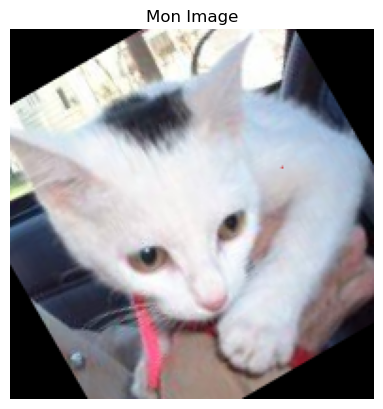

In [124]:
# Afficher l'image pivotee 
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Mon Image')
plt.axis('off')
plt.show()

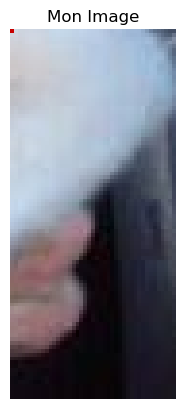

In [ ]:
#Recadrer l'image
cropped = image[100:400 , 150:450]

# Afficher l'image recadree 
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title('Mon Image')
plt.axis('off')
plt.show()

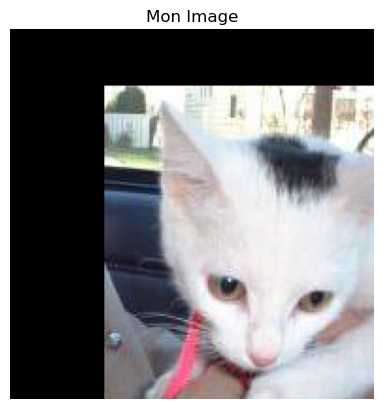

In [ ]:
#Translation 
M_translation = np.float32 ([[1 , 0 , 50] , [0 , 1 , 30]]) # Cree la matrice de translation qui deplace l'image de 50 pixel vers la droite et de 30 vers le bas
translated = cv2.warpAffine (image, M_translation, (w, h )) # Applique la translation à l'image en utilisant la matrice calculée
# Afficher l'image translatee 
plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
plt.title('Mon Image')
plt.axis('off')
plt.show()

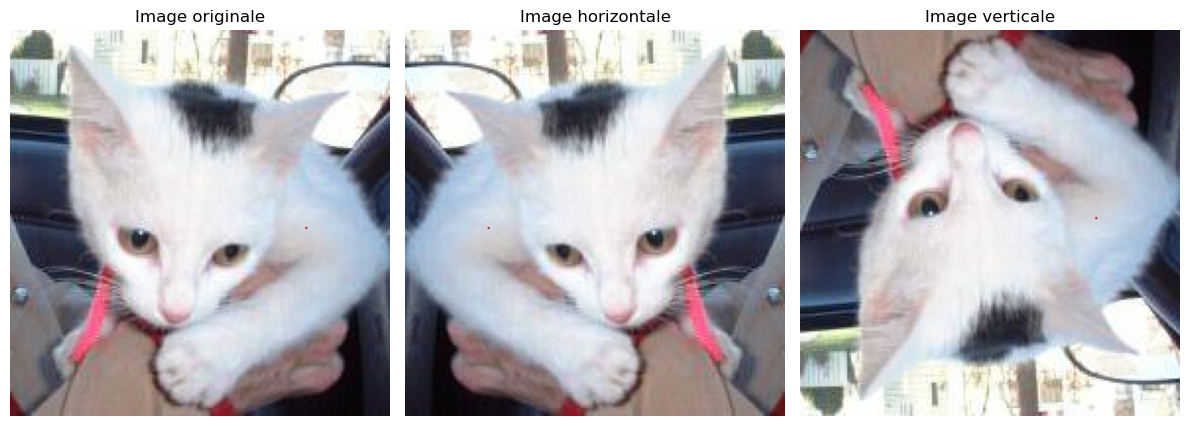

In [ ]:
#Retournement 
flip_h = cv2.flip (image, 1) # retourne l'image horizontalement
flip_v = cv2.flip (image, 0) # retourne l'image verticalement


fig, axes = plt.subplots(1, 3, figsize=(12, 10))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image originale')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(flip_h, cv2.COLOR_BGR2RGB))
axes[1].set_title('Image horizontale')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(flip_v, cv2.COLOR_BGR2RGB))
axes[2].set_title('Image verticale')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Filtrage
### 🟦 Flou moyen (Average Blur)
👉 Calcule la moyenne des pixels dans une fenêtre de taille (15x15) et remplace chaque pixel par cette moyenne.<br>
🔹 Effet : flou uniforme sur toute l’image.<br>
🔹 Utilisation : réduction du bruit simple, mais il peut rendre les contours flous.
### 🟩 Flou gaussien (Gaussian Blur)
👉 Utilise une fonction gaussienne pour pondérer les pixels voisins (les plus proches comptent plus).<br>
🔹 Effet : flou plus naturel et progressif que le flou moyen.<br>
🔹 Utilisation : réduction du bruit tout en conservant mieux les bords.<br>
🔹 Paramètre : le dernier 0 laisse OpenCV calculer automatiquement l’écart-type (sigma).
### 🟨 Flou médian (Median Blur)
👉 Remplace chaque pixel par la médiane des pixels voisins.<br>
🔹 Effet : efficace contre le bruit impulsionnel (bruit “sel et poivre”).<br>
🔹 Utilisation : nettoyage d’images contenant des points blancs ou noirs isolés.<br>
🔹 Important : la taille du noyau (15) doit être un nombre impair.
### 🟥 Flou bilatéral (Bilateral Filter)
👉 Lisse l’image tout en préservant les contours.<br>
🔹 Il prend en compte à la fois la distance spatiale et la différence de couleur entre pixels.<br>
🔹 Paramètres :<br>
15 : diamètre de la zone considérée.<br>
75 et 75 : intensité du lissage spatial et du lissage des couleurs.<br>
🔹 Utilisation : idéal pour lisser une image sans détruire les bords (ex : traitement de visages).

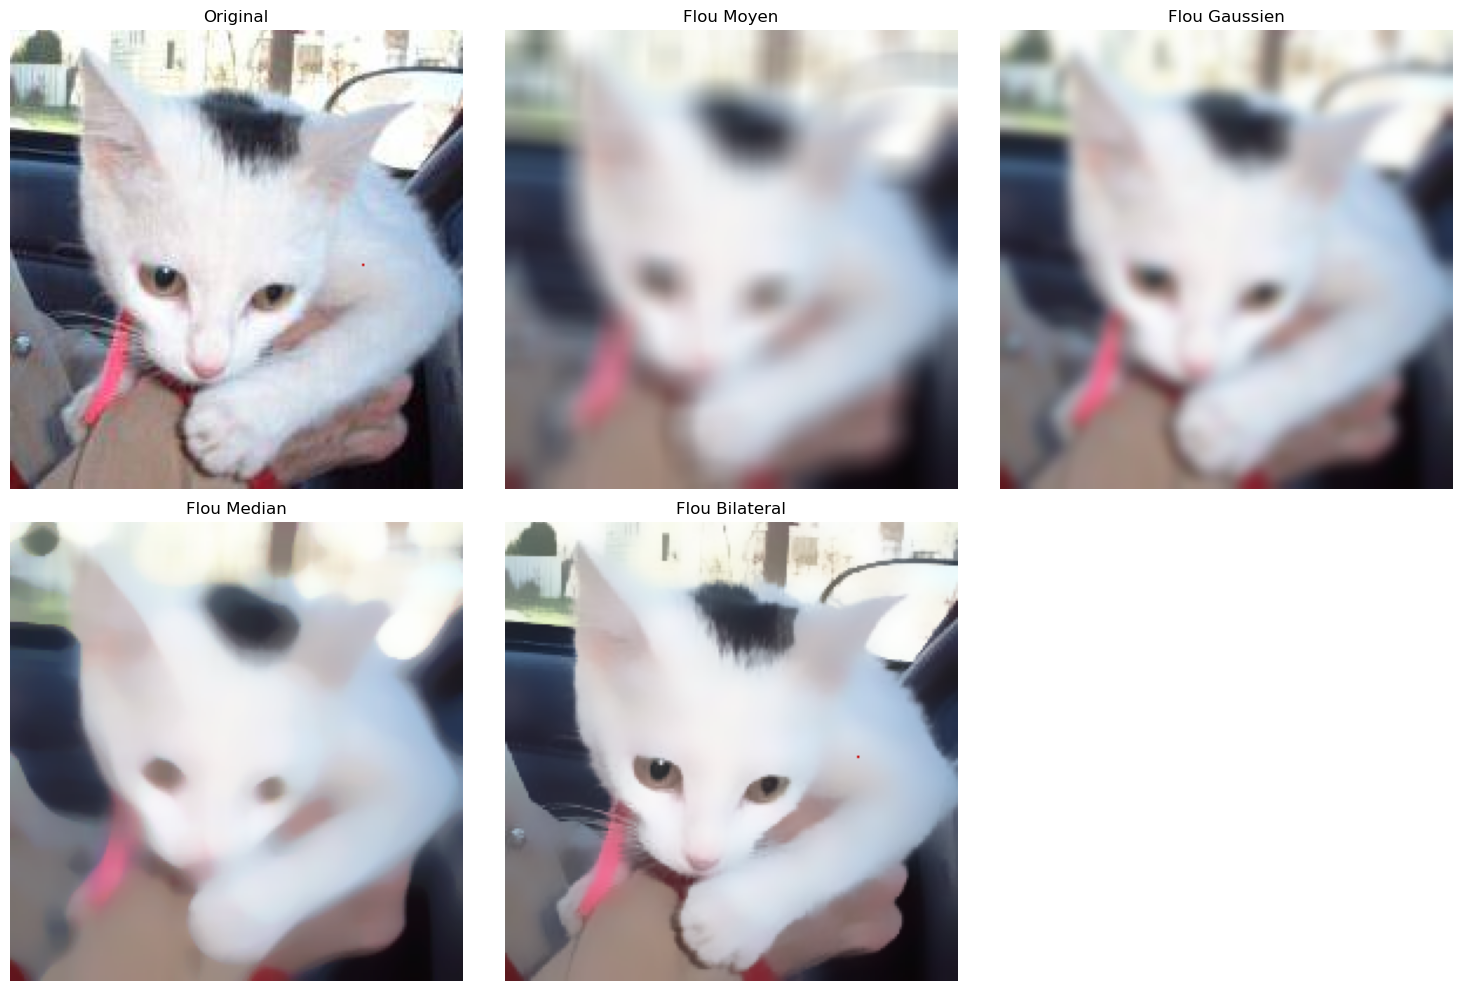

In [165]:
# Differents types de flou
blur_avg = cv2.blur(image, (15, 15))
blur_gauss = cv2.GaussianBlur(image, (15, 15), 0)
blur_median = cv2.medianBlur(image, 15)
blur_bilateral = cv2.bilateralFilter(image, 15, 75, 75)

# Visualisation
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

filtres = [
    (image, 'Original'),
    (blur_avg, 'Flou Moyen'),
    (blur_gauss, 'Flou Gaussien'),
    (blur_median, 'Flou Median'),
    (blur_bilateral, 'Flou Bilateral')
]

for ax, (image, titre) in zip(axes.flat, filtres):
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(titre)
    ax.axis('off')

axes.flat[-1].axis('off')  # Derniere case vide
plt.tight_layout()
plt.show()

## TRAITEMENT (Features, Extraction, Contours)


## Detection de contour
Pour detecter les contours nous avons les trois methodes suivantes : 
### 1️⃣ Canny
Utilise le gradient de l’image pour détecter les changements brusques d’intensité. <br>
Applique un filtre gaussien pour réduire le bruit, puis un double seuil pour distinguer les vrais contours des faux.<br>
Avantage : très précis et robuste au bruit.<br>
Inconvénient : plus lent et nécessite de bien choisir les seuils.
### 2️⃣ Sobel
Calcule l’approximation du gradient de l’image dans une direction donnée (horizontal ou vertical).<br>
Combine souvent les gradients horizontal et vertical pour obtenir l’intensité globale du contour.<br>
Avantage : simple et efficace pour détecter les bords avec orientation.<br>
Inconvénient : sensible au bruit, contours parfois flous.
### 3️⃣ Laplacien
Utilise la dérivée seconde de l’image pour détecter les zones où l’intensité change rapidement.<br>
Détecte les contours dans toutes les directions en même temps.<br>
Avantage : rapide et détecte tous les contours.<br>
Inconvénient : très sensible au bruit, peut produire des contours “fantômes”.

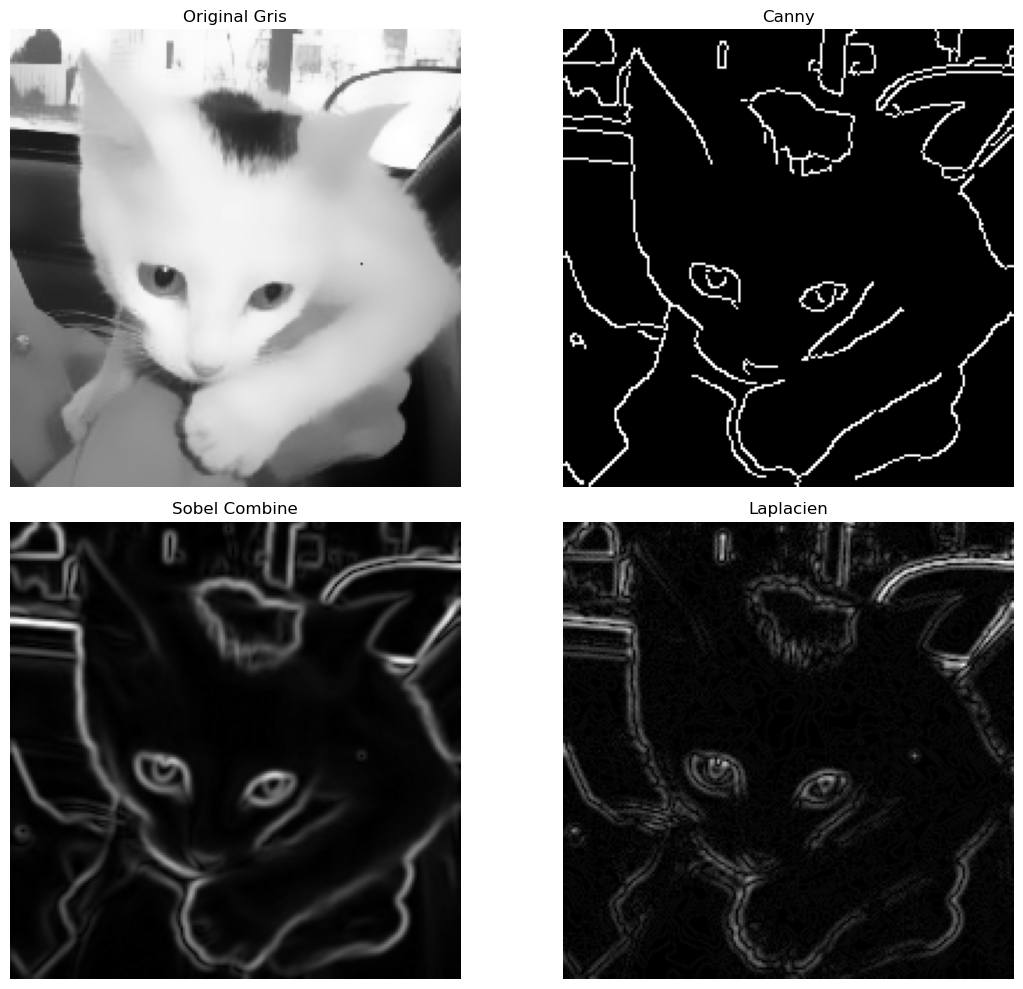

In [166]:
# Convertir en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Reduire le bruit
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Detection de contours avec Canny
edges_canny = cv2.Canny(gray_blur, 50, 150)

# Sobel
sobelx = cv2.Sobel(gray_blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

# Laplacien
laplacian = cv2.Laplacian(gray_blur, cv2.CV_64F)

# Affichage
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(gray, cmap='gray')
axes[0, 0].set_title('Original Gris')

axes[0, 1].imshow(edges_canny, cmap='gray')
axes[0, 1].set_title('Canny')

axes[1, 0].imshow(sobel_combined, cmap='gray')
axes[1, 0].set_title('Sobel Combine')

axes[1, 1].imshow(np.abs(laplacian), cmap='gray')
axes[1, 1].set_title('Laplacien')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Exo final pour le premier jour
## Créez une fonction analyser_image(chemin) qui :

Charge l'image<br>
Affiche ses propriétés (dimensions, type)<br>
Affiche les 3 canaux RGB séparément<br>
Détecte les contours<br>
Détecte une couleur de votre choix

In [129]:
def detecter_couleur(image, couleur='rouge'):
    """Detecte une couleur specifique dans une image"""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Plages HSV pour differentes couleurs
    plages = {
        'rouge': [
            (np.array([0, 100, 100]), np.array([10, 255, 255])),
            (np.array([170, 100, 100]), np.array([180, 255, 255]))
        ],
        'bleu': [
            (np.array([100, 100, 100]), np.array([130, 255, 255]))
        ],
        'vert': [
            (np.array([40, 40, 40]), np.array([80, 255, 255]))
        ],
        'jaune': [
            (np.array([20, 100, 100]), np.array([30, 255, 255]))
        ]
    }
    
    if couleur not in plages:
        print(f"Couleur '{couleur}' non reconnue")
        return None
    
    # Creer le masque
    masks = []
    for lower, upper in plages[couleur]:
        mask = cv2.inRange(hsv, lower, upper)
        masks.append(mask)
    
    # Combiner les masques
    mask_final = masks[0]
    for mask in masks[1:]:
        mask_final = cv2.add(mask_final, mask)
    
    # Extraire la couleur
    resultat = cv2.bitwise_and(image, image, mask=mask_final)
    
    return mask_final, resultat

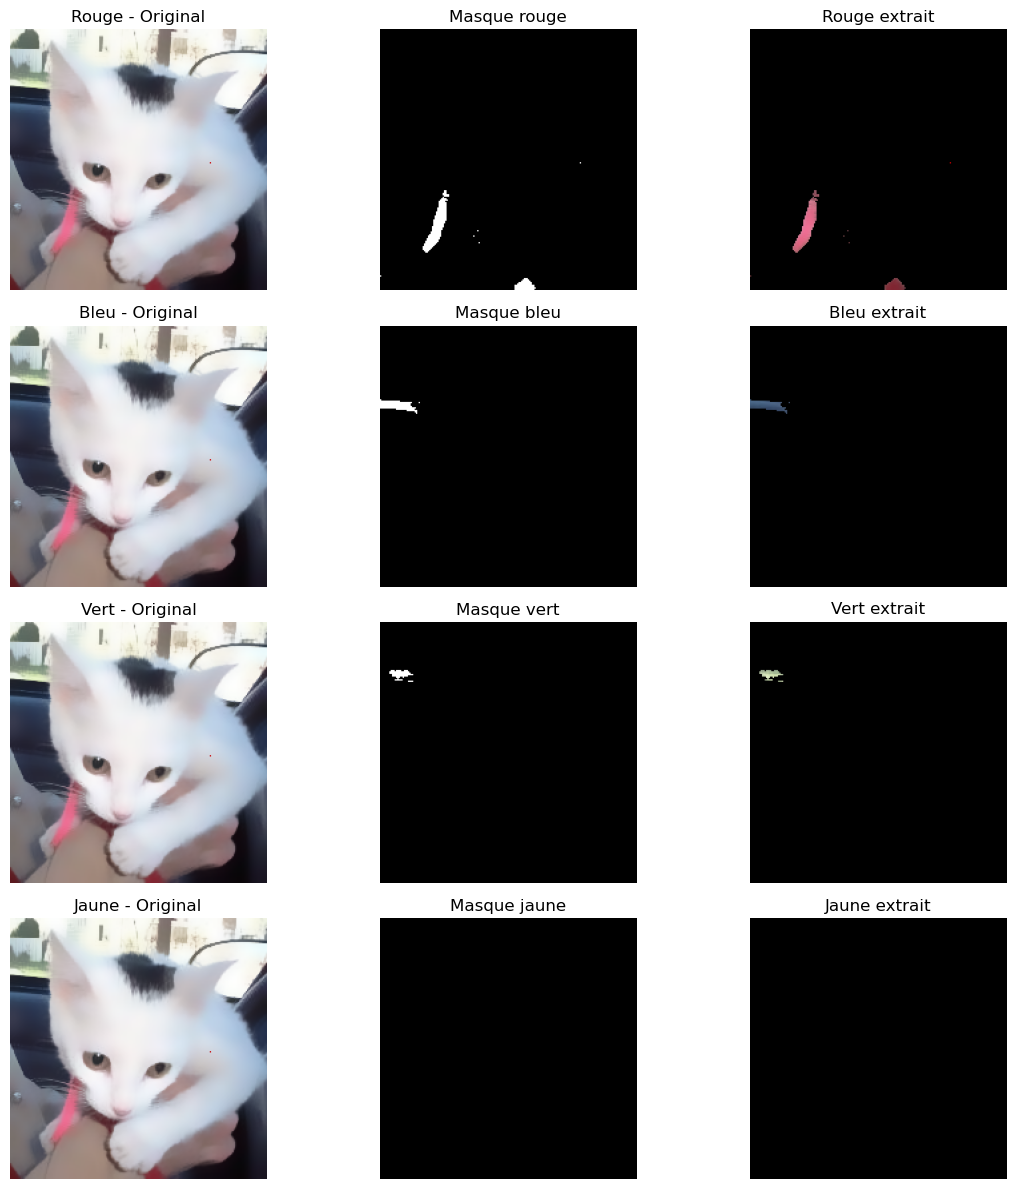

In [168]:
# Test sur toutes les couleurs
couleurs = ['rouge', 'bleu', 'vert', 'jaune']
fig, axes = plt.subplots(len(couleurs), 3, figsize=(12, 12))

for i, couleur in enumerate(couleurs):
    mask, resultat = detecter_couleur(image, couleur)
    
    axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f'{couleur.capitalize()} - Original')
    
    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].set_title(f'Masque {couleur}')
    
    axes[i, 2].imshow(cv2.cvtColor(resultat, cv2.COLOR_BGR2RGB))
    axes[i, 2].set_title(f'{couleur.capitalize()} extrait')
    
    for ax in axes[i]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [131]:
def analyser_image(chemin, couleur_detecter='rouge'):
    """Analyse complete d'une image"""
    # Charger l'image
    img = cv2.imread(chemin)
    if img is None:
        print(f"Erreur: impossible de charger {chemin}")
        return
    
    # Afficher propriétés
    print(f"Dimensions: {img.shape}")
    print(f"Type: {img.dtype}")
    
    # Séparer les canaux
    b, g, r = cv2.split(img)
    
    # Conversion niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Détection contours
    edges = cv2.Canny(gray, 50, 150)
    
    # Détection couleur
    mask, resultat = detecter_couleur(img, couleur_detecter)
    
    # Affichage
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    
    # Ligne 1 : Original et canaux
    axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title("Original")
    
    axes[0, 1].imshow(r, cmap='Reds')
    axes[0, 1].set_title("Canal Rouge")
    
    axes[0, 2].imshow(g, cmap='Greens')
    axes[0, 2].set_title("Canal Vert")
    
    # Ligne 2 : Bleu, Gris et Contours
    axes[1, 0].imshow(b, cmap='Blues')
    axes[1, 0].set_title("Canal Bleu")
    
    axes[1, 1].imshow(gray, cmap='gray')
    axes[1, 1].set_title("Grayscale")
    
    axes[1, 2].imshow(edges, cmap='gray')
    axes[1, 2].set_title("Contours Canny")
    
    # Ligne 3 : Masque et Couleur extraite
    axes[2, 0].imshow(mask, cmap='gray')
    axes[2, 0].set_title(f"Masque {couleur_detecter}")
    
    axes[2, 1].imshow(cv2.cvtColor(resultat, cv2.COLOR_BGR2RGB))
    axes[2, 1].set_title(f"{couleur_detecter.capitalize()} extrait")
    
    axes[2, 2].axis('off')  # vide
    
    for ax in axes.flat:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return {
        "img": img,
        "mask": mask,
        "resultat": resultat,
        "edges": edges
    }



Dimensions: (196, 193, 3)
Type: uint8


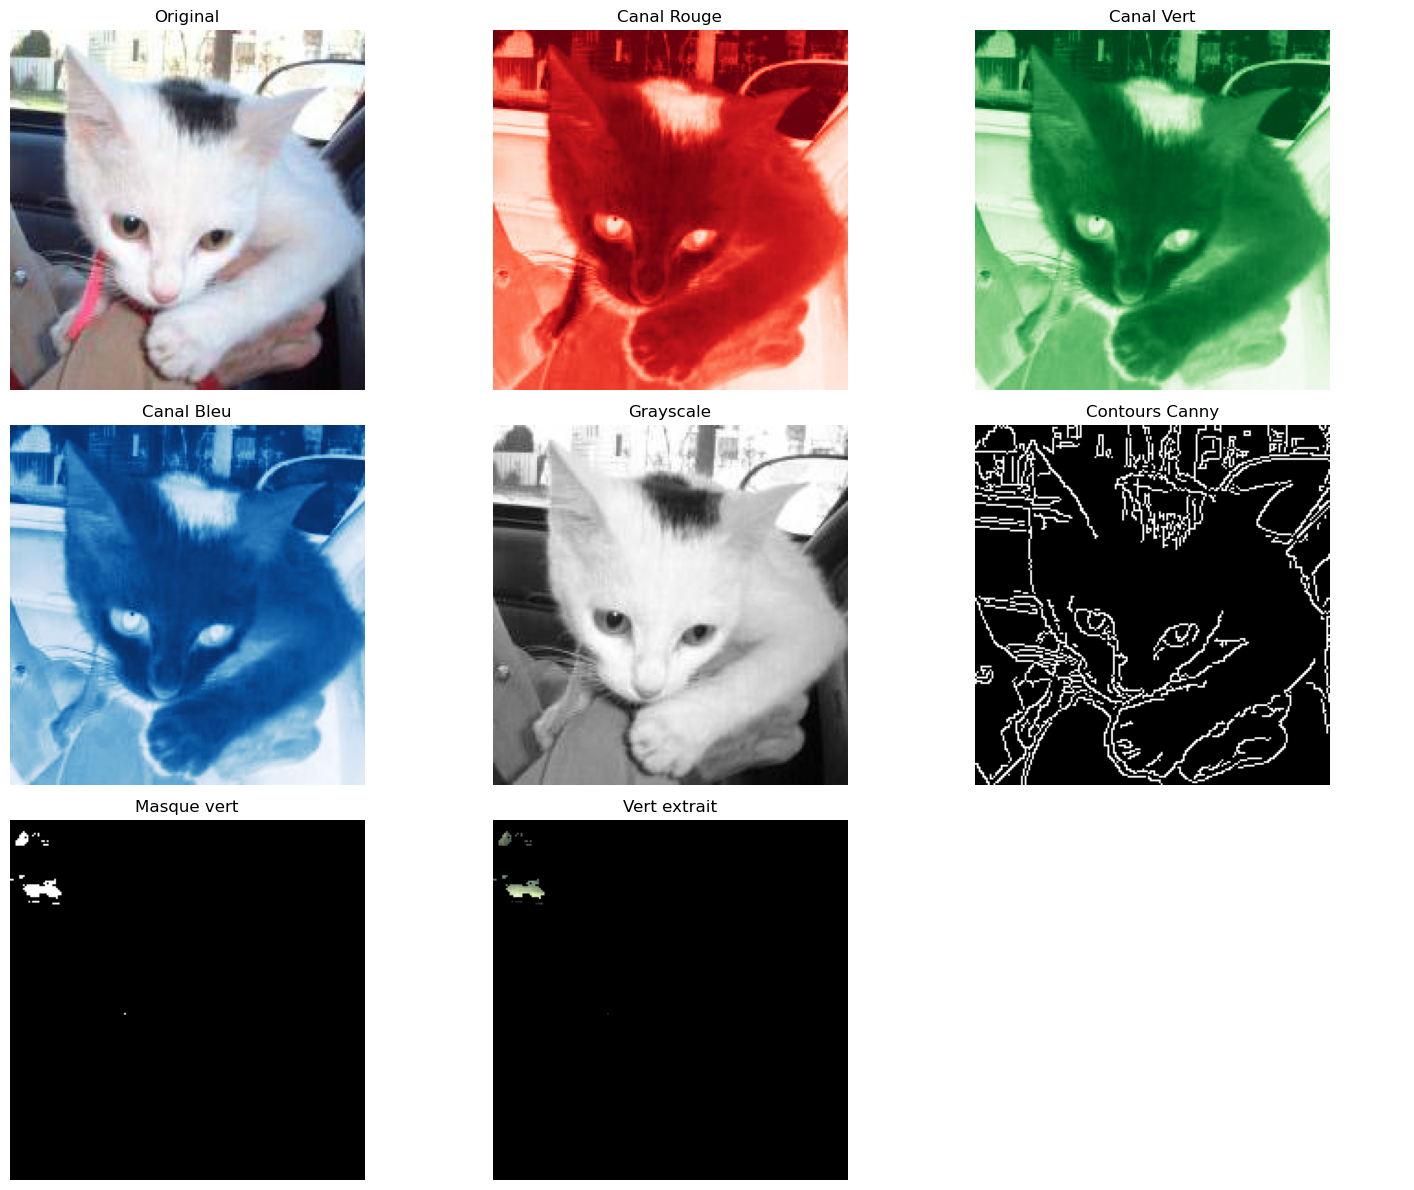

In [132]:
resultats = analyser_image("cat.jpg", couleur_detecter="vert")